<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Master/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [3]:
!pip install pydot
!apt install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [4]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from tensorflow.keras.utils import plot_model
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [7]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.7)]
Train_Y = Data_Y[:int(len(Data_Y)*0.7)]
#Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
#Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
#print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
#print(Vald_Y.shape)
print(Test_Y.shape)

print(Data_X.shape)
print(Data_Y.shape)
print(Data_X[:10])
print(Data_Y[:10].astype('int'))

(22950, 5, 5000, 1)
(16064, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(16064, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)
[[[[ 0.13094077]
   [ 0.13426788]
   [ 0.13725989]
   ...
   [ 0.29248513]
   [ 0.29248513]
   [ 0.29248513]]

  [[ 0.1185824 ]
   [ 0.12181842]
   [ 0.12472851]
   ...
   [ 0.2930481 ]
   [ 0.2930481 ]
   [ 0.2930481 ]]

  [[ 0.06765384]
   [ 0.06765384]
   [ 0.06765384]
   ...
   [ 0.0653845 ]
   [ 0.0653845 ]
   [ 0.0653845 ]]

  [[ 0.10997413]
   [ 0.10997413]
   [ 0.10997413]
   ...
   [ 0.05445085]
   [ 0.05445085]
   [ 0.05445085]]

  [[ 0.31572279]
   [ 0.30807951]
   [ 0.29945085]
   ...
   [ 0.20175829]
   [ 0.20368338]
   [ 0.20553999]]]


 [[[ 0.09996753]
   [ 0.09996753]
   [ 0.09996753]
   ...
   [ 0.1853474 ]
   [ 0.1897277 ]
   [ 0.19018248]]

  [[ 0.09835145]
   [ 0.09877051]
   [ 0.10244886]
   ...
   [ 0.22707055]
   [ 0.22707055]
   [ 0.22707055]]

  [[ 0.12270904]
   [ 0.12426921]
   [ 0.12554571]
   ...
   [ 0.13322839]
   [ 0.13594687]
   [ 0.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 5, 5000, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 4, 2498, 50)  550         ['data[0][0]']                   
                                                                                                  
 conv2d_1 (Conv2D)              (None, 4, 1247, 50)  12550       ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 4, 1247, 50)  200        ['conv2d_1[0][0]']           

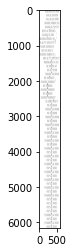

In [8]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 50, kernel_size = (2, 5),strides=(1, 2), activation = "relu") (inputs)
x = layers.Conv2D(filters = 50, kernel_size = (1, 5),strides=(1, 2), activation = "relu") (x)
x = layers.BatchNormalization()(x)
block_1_output = layers.MaxPooling2D(pool_size = (1,100)) (x)

x = layers.Conv2D(filters = 50, kernel_size = (1,5),strides = (1, 2),padding = 'valid', activation='relu') (block_1_output)
x = layers.Conv2D(filters = 50, kernel_size = (1,4),strides = (1, 2),padding = 'valid', activation='relu') (x)
x = layers.BatchNormalization()(x)
block_3_output = layers.add([x, block_1_output])
block_2_output = layers.MaxPooling2D(pool_size = (1,8)) (block_3_output)

x = layers.Conv2D(filters = 50,kernel_size= (1, 1),strides = (1, 2), activation="relu")(block_2_output)
x = layers.BatchNormalization()(x)
block_4_output = layers.add([x, block_1_output])
x = layers.MaxPooling2D(pool_size = (1,1))(block_4_output)

#x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

#x = layers.AveragePooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
#x = layers.AveragePooling2D(pool_size = (1,4))(x)

'''
x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (inputs)
block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
 
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
 
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
 
block_6_output = layers.add([x, block_3_output])
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
block_7_output = layers.add([x, block_6_output])
 
x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
 '''
x = layers.Flatten()(x) 
 
 
x = layers.Dense(64, activation="relu")(x)
#x = layers.BatchNormalization()(x)
block_5_output = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(block_5_output)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
block_6_output = layers.add([x, block_5_output])
x = layers.Dense(58, activation="relu")(block_6_output)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(46, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(46, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation="relu")(x)

x = layers.Dense(28, activation="relu")(x)
x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
block_7_output = layers.BatchNormalization()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(16, activation="relu")(x)
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
block_8_output = layers.add([x, block_7_output])
x = layers.Dense(16, activation="relu")(block_7_output)

x = layers.BatchNormalization()(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [16]:
del(Data_X)
del(Data_Y)

In [17]:
print(Data_X.shape)

NameError: ignored

In [18]:
'''from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
model_optimizer = KerasClassifier(build_fn = model, verbose=0)
batch_size = [10, 20, 40, 60]#, 80, 100, 200, 400, 600]
epochs = [10, 50, 100]#, 150, 200]
param_grid = dict(batch_size = batch_size, epochs=epochs)
grid = GridSearchCV(estimator = model_optimizer, param_grid=param_grid, n_jobs=-1, cv=3)
Train_X_sample = Train_X[:int(len(Train_X)/5000)]
Train_Y_sample = Train_Y[:int(len(Train_Y)/5000)]
grid_result = grid.fit(Train_X_sample, Train_Y_sample)

#summarize results
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
'''

'from sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\nmodel_optimizer = KerasClassifier(build_fn = model, verbose=0)\nbatch_size = [10, 20, 40, 60]#, 80, 100, 200, 400, 600]\nepochs = [10, 50, 100]#, 150, 200]\nparam_grid = dict(batch_size = batch_size, epochs=epochs)\ngrid = GridSearchCV(estimator = model_optimizer, param_grid=param_grid, n_jobs=-1, cv=3)\nTrain_X_sample = Train_X[:int(len(Train_X)/5000)]\nTrain_Y_sample = Train_Y[:int(len(Train_Y)/5000)]\ngrid_result = grid.fit(Train_X_sample, Train_Y_sample)\n\n#summarize results\nprint("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n  print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [19]:
history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 50, verbose=2)#, validation_data=(Vald_X,Vald_Y))

Epoch 1/100
322/322 - 24s - loss: 1.7358 - accuracy: 0.3483 - 24s/epoch - 75ms/step
Epoch 2/100
322/322 - 10s - loss: 0.6950 - accuracy: 0.6445 - 10s/epoch - 32ms/step
Epoch 3/100
322/322 - 10s - loss: 0.5570 - accuracy: 0.7037 - 10s/epoch - 32ms/step
Epoch 4/100
322/322 - 10s - loss: 0.4794 - accuracy: 0.7489 - 10s/epoch - 32ms/step
Epoch 5/100
322/322 - 11s - loss: 0.4396 - accuracy: 0.7840 - 11s/epoch - 34ms/step
Epoch 6/100
322/322 - 10s - loss: 0.3710 - accuracy: 0.8281 - 10s/epoch - 32ms/step
Epoch 7/100
322/322 - 10s - loss: 0.3199 - accuracy: 0.8497 - 10s/epoch - 31ms/step
Epoch 8/100
322/322 - 10s - loss: 0.2997 - accuracy: 0.8590 - 10s/epoch - 31ms/step
Epoch 9/100
322/322 - 10s - loss: 0.3369 - accuracy: 0.8432 - 10s/epoch - 32ms/step
Epoch 10/100
322/322 - 10s - loss: 0.2939 - accuracy: 0.8597 - 10s/epoch - 31ms/step
Epoch 11/100
322/322 - 10s - loss: 0.2734 - accuracy: 0.8640 - 10s/epoch - 31ms/step
Epoch 12/100
322/322 - 10s - loss: 0.2809 - accuracy: 0.8625 - 10s/epoch -

In [20]:
#Test_X,Test_Y = prepare_test_data()

#Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
print(Test_X.shape)
print(Test_Y.shape)
print(to_categorical(Test_Y).shape)
print(Train_X.shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(6886, 9, 2)
(16064, 5, 5000, 1)
(16064, 9)
(16064, 9, 2)


In [ ]:
from numpy import argmax
from numpy import random
print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X,  Vald_Y, verbose=0))
print ('Testing    ', model.metrics_names,' = ',model.evaluate(Test_X,  Test_Y, verbose=0))

print ('true (Test)     \n',argmax(Test_Y,axis=1))
print ('predicted (Test)\n',argmax(model.predict(Test_X), axis=1))

print ('true (Train)     \n',argmax(Train_Y[:10],axis=1))    
print ('predicted (Train)\n', argmax(model.predict(Train_X[:10]), axis=1))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
#print (model.summary())
 
 
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_Predict.csv',argmax(model.predict(Test_X), axis=1),delimiter=',')
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_True.csv',argmax(Test_Y,axis=1),delimiter=',')

In [ ]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:

model.save('/content/drive/My Drive/Colab_Data/Fault_Detect/my_model.h5')
